In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#This command allows visuals to appear in notebook
%matplotlib inline 

In [3]:
#creating path
path= r'C:\Users\13472\Documents\Task 6'

In [4]:
#Importing dataset
df_cacao_cleaned = pd.read_csv(os.path.join(path,'02. Prepared Data','df_cacao_cleaned.csv' ),index_col = False)

In [5]:
df_cacao_cleaned.head()

,Unnamed: 0,Company_Name,Bar Origin,Ref,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


# Data Wrangling

In [6]:
#Unnamed:0 column not needed, we are going to drop column
df_cacao_cleaned = df_cacao_cleaned.drop('Unnamed: 0', axis='columns')

In [7]:
df_cacao_cleaned.head()

,Company_Name,Bar Origin,Ref,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [8]:
# Changing cocoa_percentage data type
df_cacao_cleaned['Cocoa_Percentage'] = df_cacao_cleaned['Cocoa_Percentage'].str.replace('%','').astype(float)/100

# Consistency Check

In [9]:
df_cacao_cleaned.columns

Index(['Company_Name', ' Bar Origin', 'Ref', 'Review_Date', 'Cocoa_Percentage',
       ' Company_Location', 'Rating', 'Bean_Origin'],
      dtype='object')

In [10]:
df_cacao_cleaned.head(20)

,Company_Name,Bar Origin,Ref,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru
5,A. Morin,Carenero,1315,2014,0.70,France,2.75,Venezuela
6,A. Morin,Cuba,1315,2014,0.70,France,3.50,Cuba
7,A. Morin,Sur del Lago,1315,2014,0.70,France,3.50,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,0.70,France,3.75,Venezuela
9,A. Morin,Pablino,1319,2014,0.70,France,4.00,Peru


In [11]:
df_cacao_cleaned.shape

(1795, 8)

In [12]:
df_cacao_cleaned.isnull().sum()

Company_Name          0
 Bar Origin           0
Ref                   0
Review_Date           0
Cocoa_Percentage      0
 Company_Location     0
Rating                0
Bean_Origin          74
dtype: int64

# Checking for Duplicates

In [13]:
Dups = df_cacao_cleaned.duplicated()

In [14]:
Dups.shape

(1795,)

No duplicates

# 1st variable - Cocoa_Percentage

<Axes: xlabel='Cocoa_Percentage', ylabel='Count'>

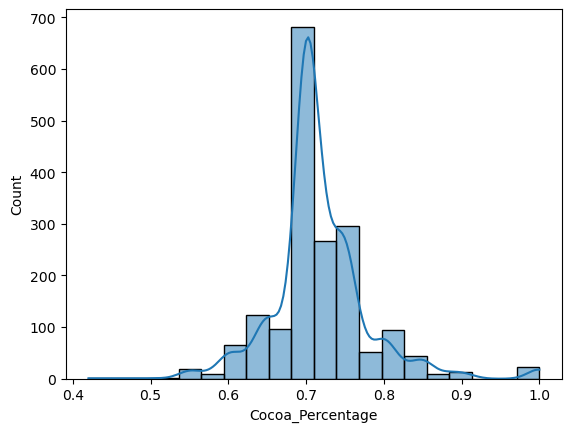

In [15]:
sns.histplot(df_cacao_cleaned['Cocoa_Percentage'], bins=20, kde = True)

In [16]:
# Checking the mean
df_cacao_cleaned['Cocoa_Percentage'].mean()

0.7169832869080781

In [17]:
#Checking the median
df_cacao_cleaned['Cocoa_Percentage'].median()

0.7

In [18]:
#Checking the max
df_cacao_cleaned['Cocoa_Percentage'].max()

1.0

# 2nd variable - Rating

<Axes: xlabel='Rating', ylabel='Count'>

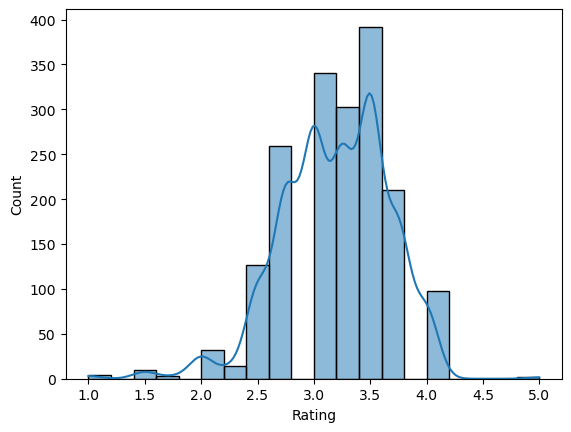

In [19]:
sns.histplot(df_cacao_cleaned['Rating'], bins=20, kde = True)

In [20]:
# Checking the mean
df_cacao_cleaned['Rating'].mean()

3.185933147632312

In [21]:
#Checking the median
df_cacao_cleaned['Rating'].median()

3.25

In [22]:
#Checking the max
df_cacao_cleaned['Rating'].max()

5.0

# Prepping for Regression Analysis

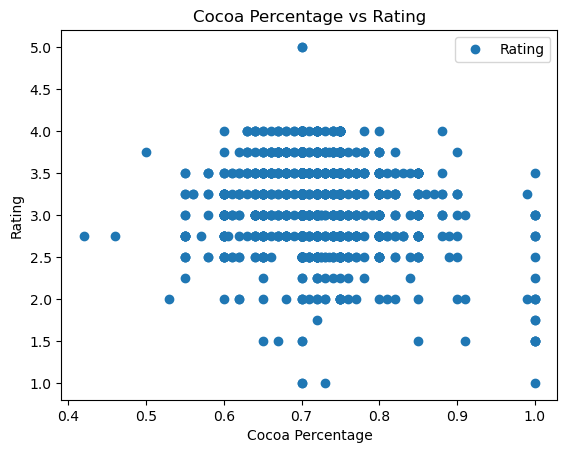

In [24]:
#Creating a scatterplot using matplotlib
df_cacao_cleaned.plot(x = 'Cocoa_Percentage', y='Rating',style='o') 
plt.title('Cocoa Percentage vs Rating')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.show()

Hypothesis: Chocolate bars that have a higher percentage of cocoa will have a higher rating. 

# Reshaping variable into NumPy

In [28]:
X = df_cacao_cleaned['Cocoa_Percentage'].values.reshape(-1,1)
y = df_cacao_cleaned['Rating'].values.reshape(-1,1)

In [29]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [27]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [30]:
# Split the data into two sets: a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Linear Regression Analysis

In [31]:
# Creating a regression object
regression = LinearRegression()

In [32]:
# Fit the model into a training set.
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the value of y using X
y_predicted = regression.predict(X_test)

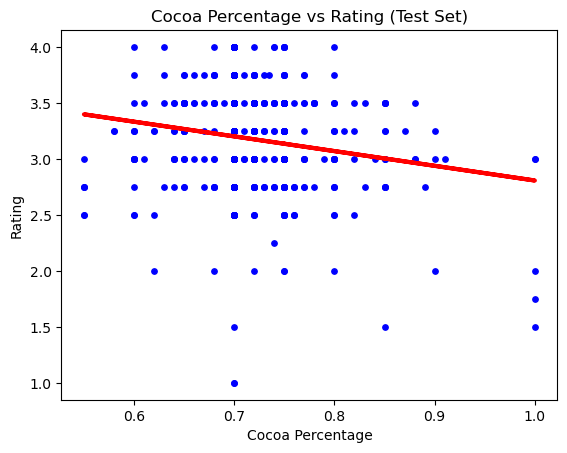

In [34]:
# Create a plot that shows the regression line on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 3)
plot_test.title('Cocoa Percentage vs Rating (Test Set)')
plot_test.xlabel('Cocoa Percentage')
plot_test.ylabel('Rating')
plot_test.show()

You can notice that the points are not very close to the regression line. 

In [35]:
# Creating objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [36]:
# Checking performance statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.3132551]]
Mean squared error:  0.2095351310152621
R2 score:  0.01811002046167509


In [37]:
y_predicted

array([[3.13545711],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.06979435],
       [3.39810813],
       [3.20111986],
       [3.13545711],
       [3.25365007],
       [3.26678262],
       [3.27991517],
       [3.20111986],
       [3.26678262],
       [3.20111986],
       [3.13545711],
       [3.06979435],
       [3.0041316 ],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.16172221],
       [3.39810813],
       [2.80714333],
       [3.33244537],
       [3.13545711],
       [3.13545711],
       [3.22738497],
       [3.20111986],
       [3.22738497],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.13545711],
       [3.20111986],
       [3.17485476],
       [3.27991517],
       [3.17485476],
       [3.20111986],
       [3.13545711],
       [3.26678262],
       [3.20111986],
       [3.39810813],
       [3.20111986],
       [3.33244537],
       [3.10919201],
       [3.135

In [38]:
# Compare the predicted y values with the actual y values in a dataframe
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.135457
1,2.75,3.174855
2,2.50,3.201120
3,3.25,3.201120
4,3.25,3.069794
5,2.75,3.398108
6,3.50,3.201120
7,2.50,3.135457
8,3.50,3.253650
9,3.50,3.266783


In [39]:
# Predict
y_predicted_train = regression.predict(X_train)

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
# Checking perfomance statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.3132551]]
Mean squared error:  0.22774918296663346
R2 score:  0.029784249226460058


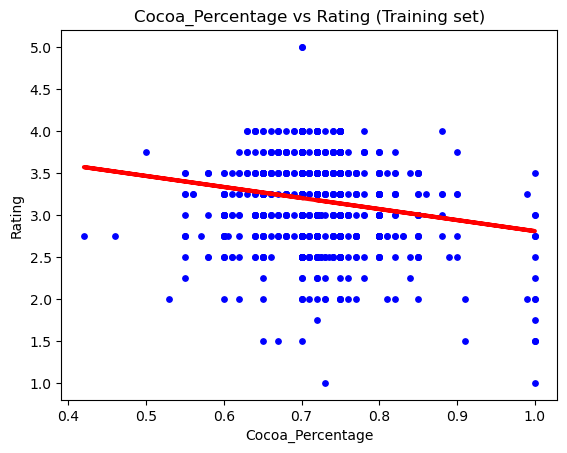

In [42]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa_Percentage vs Rating (Training set)')
plot_test.xlabel('Cocoa_Percentage')
plot_test.ylabel('Rating')
plot_test.show()

Comparing the summary statistics we can see that the training set is only slightly better than the test set, therefore it is still not a good fit. 